In [ ]:
"""
This code sample shows Custom Extraction Model operations with the Azure Form Recognizer client library.
The async versions of the samples require Python 3.6 or later.

To learn more, please visit the documentation - Quickstart: Form Recognizer Python client library SDKs
https://docs.microsoft.com/en-us/azure/applied-ai-services/form-recognizer/quickstarts/try-v3-python-sdk
"""

from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient

"""
Remember to remove the key from your code when you're done, and never post it publicly. For production, use
secure methods to store and access your credentials. For more information, see
https://docs.microsoft.com/en-us/azure/cognitive-services/cognitive-services-security?tabs=command-line%2Ccsharp#environment-variables-and-application-configuration
"""
endpoint = "YOUR_FORM_RECOGNIZER_ENDPOINT"
key = "YOUR_FORM_RECOGNIZER_KEY"

model_id = "YOUR_CUSTOM_BUILT_MODEL_ID"
formUrl = "YOUR_DOCUMENT"

document_analysis_client = DocumentAnalysisClient(
    endpoint=endpoint, credential=AzureKeyCredential(key)
)

# Make sure your document's type is included in the list of document types the custom model can analyze
poller = document_analysis_client.begin_analyze_document_from_url(model_id, formUrl)
result = poller.result()

for idx, document in enumerate(result.documents):
    print("--------Analyzing document #{}--------".format(idx + 1))
    print("Document has type {}".format(document.doc_type))
    print("Document has confidence {}".format(document.confidence))
    print("Document was analyzed by model with ID {}".format(result.model_id))
    for name, field in document.fields.items():
        field_value = field.value if field.value else field.content
        print("......found field of type '{}' with value '{}' and with confidence {}".format(field.value_type, field_value, field.confidence))


# iterate over tables, lines, and selection marks on each page
for page in result.pages:
    print("\nLines found on page {}".format(page.page_number))
    for line in page.lines:
        print("...Line '{}'".format(line.content.encode('utf-8')))
    for word in page.words:
        print(
            "...Word '{}' has a confidence of {}".format(
                word.content.encode('utf-8'), word.confidence
            )
        )
    for selection_mark in page.selection_marks:
        print(
            "...Selection mark is '{}' and has a confidence of {}".format(
                selection_mark.state, selection_mark.confidence
            )
        )

for i, table in enumerate(result.tables):
    print("\nTable {} can be found on page:".format(i + 1))
    for region in table.bounding_regions:
        print("...{}".format(i + 1, region.page_number))
    for cell in table.cells:
        print(
            "...Cell[{}][{}] has content '{}'".format(
                cell.row_index, cell.column_index, cell.content.encode('utf-8')
            )
        )
print("-----------------------------------")


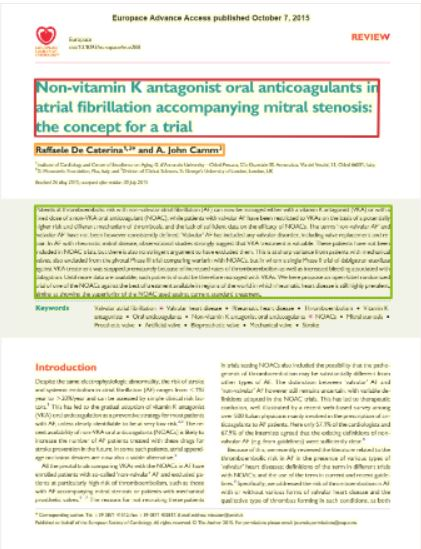